In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
def populationreg(x_train, y_train):
    
    reg = LinearRegression()
    reg.fit(x_train, y_train)
    return reg

In [3]:
def regReturn(country, year, country_list, data):
    
    
    if country in country_list:
    
        data = data.loc[data['Country Name'] == country]
        data.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)
        data = data.T
        data.dropna(inplace=True)
        data = data.reset_index()
        x1 = data.iloc[:, 0]
        y1 = data.iloc[:, 1]
        x = x1.to_numpy().reshape(-1, 1).astype(int)
        y = y1.to_numpy().reshape(-1, 1).astype(int)
        
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1 )
        
        reg = populationreg(x_train, y_train)
        predict_pop = int(reg.coef_[0][0] * year + reg.intercept_[0])
        print("%s ulkesinin %d yilinda hesaplanan nufusu %d " % (country, year, predict_pop))
        plt.scatter(x_train, y_train, color="red")
        plt.scatter(x_test, y_test, color="blue")
        
        plt.plot(x_train, reg.predict(x_train),color="green")
        plt.title("Nufus verisi icin olusturulan regresyon dogrusu")
        plt.xlabel("Yil")
        plt.ylabel("Nufus")
        plt.show()

    else:
        print("Verisetinde ulke adi bulunamadi")

In [4]:
def regAllCountry(year,data):
    data = data.T
    data.dropna(inplace=True)
    data = data.reset_index()
    x1 = data.iloc[:, 0]
    y1 = data.iloc[:, 1]
    x = x1.to_numpy().reshape(-1, 1).astype(int)
    y = y1.to_numpy().reshape(-1, 1).astype(int)
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
    reg = populationreg(x_train, y_train)
    predict_pop = int(reg.coef_[0][0] * year + reg.intercept_[0])
    print("Dunyanin %d yili icin hesaplanan nufusu : %d " % (year, predict_pop))
    plt.scatter(x_train, y_train, color="red")
    plt.scatter(x_test, y_test, color="blue")

    plt.plot(x_train, reg.predict(x_train),color="green")
    plt.title("Nufus verisi icin olusturulan regresyon dogrusu")
    plt.xlabel("Yil")
    plt.ylabel("Nufus")
    plt.show()


In [5]:
def allCountryPop(data, year):
    data.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)
    dataAll = data.max()
    regAllCountry(year,dataAll)

In [6]:
data = pd.read_csv('pop2.csv')

In [7]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0


In [8]:
data.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1806279.0
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,...,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0,30490639.0
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,...,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0,60041996.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,...,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0,18920657.0
265,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,3776679.0,3905038.0,4039209.0,4178726.0,4322854.0,4471178.0,...,13115149.0,13350378.0,13586710.0,13814642.0,14030338.0,14236599.0,14438812.0,14645473.0,14862927.0,15092171.0


In [9]:
data.describe()


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,...,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02
mean,1.172174e+08,1.187633e+08,1.208717e+08,1.234910e+08,1.261315e+08,1.288372e+08,1.316853e+08,1.345256e+08,1.374350e+08,1.404490e+08,...,2.874902e+08,2.912969e+08,2.951160e+08,2.989277e+08,3.027560e+08,3.065980e+08,3.103591e+08,3.140425e+08,3.176734e+08,3.210893e+08
std,3.695745e+08,3.739180e+08,3.804316e+08,3.889142e+08,3.974401e+08,4.062000e+08,4.155171e+08,4.247722e+08,4.342805e+08,4.441772e+08,...,9.017511e+08,9.129343e+08,9.241050e+08,9.352101e+08,9.463321e+08,9.575052e+08,9.683483e+08,9.788967e+08,9.891628e+08,9.988295e+08
min,2.833000e+03,3.077000e+03,3.367000e+03,3.703000e+03,4.063000e+03,4.460000e+03,4.675000e+03,4.922000e+03,5.194000e+03,5.461000e+03,...,1.013600e+04,1.020800e+04,1.028900e+04,1.037400e+04,1.047400e+04,1.057700e+04,1.067800e+04,1.076400e+04,1.083400e+04,1.087300e+04
25%,5.022802e+05,5.109642e+05,5.206540e+05,5.311622e+05,5.421252e+05,5.533362e+05,5.647475e+05,5.823645e+05,5.981078e+05,6.100030e+05,...,1.539939e+06,1.574621e+06,1.609909e+06,1.645868e+06,1.689616e+06,1.716772e+06,1.740174e+06,1.751950e+06,1.767996e+06,1.791783e+06
50%,3.718330e+06,3.826398e+06,3.929109e+06,4.015834e+06,4.124521e+06,4.242788e+06,4.326013e+06,4.387887e+06,4.474171e+06,4.550402e+06,...,9.824808e+06,9.948838e+06,1.001582e+07,1.022085e+07,1.036160e+07,1.040671e+07,1.045548e+07,1.047907e+07,1.052565e+07,1.054019e+07
75%,2.636053e+07,2.721235e+07,2.808607e+07,2.890669e+07,2.972333e+07,3.055227e+07,3.134845e+07,3.200449e+07,3.244145e+07,3.277149e+07,...,6.057984e+07,6.120753e+07,6.174243e+07,6.182699e+07,6.187352e+07,6.191725e+07,6.193141e+07,6.150589e+07,6.157091e+07,6.295547e+07
max,3.032156e+09,3.071596e+09,3.124561e+09,3.189656e+09,3.255146e+09,3.322047e+09,3.392098e+09,3.461620e+09,3.532783e+09,3.606554e+09,...,7.089255e+09,7.175500e+09,7.261847e+09,7.347679e+09,7.433651e+09,7.519371e+09,7.602716e+09,7.683806e+09,7.763933e+09,7.836631e+09


In [ ]:
country = input("Ulke adini giriniz: ").title()

In [ ]:
year = int(input("hesaplanacak yili giriniz: "))

In [16]:
country_list = data['Country Name'].tolist()

KeyError: 'Country Name'

In [17]:
regReturn(country, year, country_list, data)

KeyError: 'Country Name'

Dunyanin 2030 yili icin hesaplanan nufusu : -2147483648 


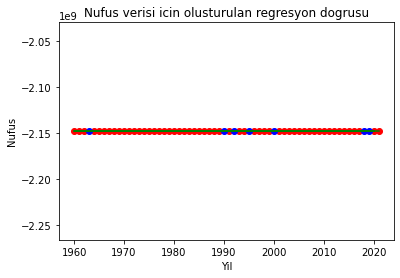

In [14]:
allCountryPop(data, year)